In [1]:
import os

#  > Define Parameters of Simulation

In [2]:
# Set Working Directory
os.chdir(r'C:\Users\g.varvounis\Documents\RiskQuantification')

# Set number of simulated scenarios 
number_of_scenarios = 10000
# Set number of steps (horizon) of the simulation
number_of_steps = 1

# Set directory of risk register lite file
directory_of_risk_register_lite = r'C:\Users\g.varvounis\Documents\RiskQuantification\runner\inputs'
filename_of_risk_register_lite = r'risk register lite.xlsx'
sheetname_of_risk_register_lite = r'RR Lite'

# Set directory of code's outputs
desired_directory_for_code_outputs = r'C:\Users\g.varvounis\Documents\RiskQuantification\runner\outputs'

# Set additional parameters of code
save_intermediate_files_produced_during_run = True
#replication_id = 110
replication_id = 50
materialization_of_risks_based_on_bernoulli_distro = True


# Cap of Impact
use_cap=True
cap_val = 400000000

# Use static file for impact
use_static_file = True

#  > Define Parameters of Reporting

In [18]:
# Histogramm parameters
bins_number=200

# Import Modules & Dependencies

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

from scipy import stats as st
from tools.reporting import *
from main import perform_risk_register_quantification

# Perform Simulation of Risk Factors' Impact

In [5]:
if not use_static_file:
    df_results, dictionary_per_rf, df_horizon_summary, df_metrics = perform_risk_register_quantification(
            number_of_scenarios=number_of_scenarios, number_of_steps=number_of_steps,
            risk_register_lite_path=directory_of_risk_register_lite, risk_register_lite_filename=filename_of_risk_register_lite,
            risk_register_sheet_name=sheetname_of_risk_register_lite, output_path_folder=desired_directory_for_code_outputs,
            save_interim_outputs=save_intermediate_files_produced_during_run, seed_to_replicate_samples=replication_id,
            bernoulli_materialization_of_risks=materialization_of_risks_based_on_bernoulli_distro, apply_cap=use_cap, selected_cap=cap_val)
else:
    df_results = pd.read_excel(r'C:\Users\g.varvounis\Documents\RiskQuantification\runner\inputs\_static_files\Total Simulated Impacts.xlsx', sheet_name='Sheet1')
    df_metrics = pd.read_excel(r'C:\Users\g.varvounis\Documents\RiskQuantification\runner\inputs\_static_files\Total Impact Metrics at Horizon.xlsx', sheet_name='Sheet1')
    df_horizon_summary = pd.read_excel(
        r'C:\Users\g.varvounis\Documents\RiskQuantification\runner\inputs\_static_files\Horizon Results.xlsx', sheet_name='Sheet1', index_col=0)

INFO - Simulating impact of risk factor 2066...
INFO - Simulation of impact for risk factor 2066 completed successfully!
INFO - Simulating impact of risk factor 2023...
INFO - Simulation of impact for risk factor 2023 completed successfully!
INFO - Simulating impact of risk factor 2201...
INFO - Simulation of impact for risk factor 2201 completed successfully!
INFO - Simulating impact of risk factor 2004...
INFO - Simulation of impact for risk factor 2004 completed successfully!
INFO - Simulating impact of risk factor 2067...
INFO - Simulation of impact for risk factor 2067 completed successfully!
INFO - Simulating impact of risk factor 2020...
INFO - Simulation of impact for risk factor 2020 completed successfully!
INFO - Simulating impact of risk factor 2012...
INFO - Simulation of impact for risk factor 2012 completed successfully!
INFO - Simulating impact of risk factor 2084...
INFO - Simulation of impact for risk factor 2084 completed successfully!
INFO - Simulating impact of risk

In [6]:
#df_results

In [7]:
#dictionary_per_rf["2002"]

In [8]:
#dictionary_per_rf["2001"]

# Reporting

## Test Reporting

In [9]:
# plt.figure(figsize=(12, 8))
#plot_simulation(df_results)

In [10]:
# plt.figure(figsize=(12, 8))
#dictionary_per_rf["2001"]
#plot_simulated_distribution(dictionary_per_rf, "2002", bins=bins_number)

In [11]:
#plot_path(dictionary_per_rf, "2001", scenario_index=3)

## Final Reporting

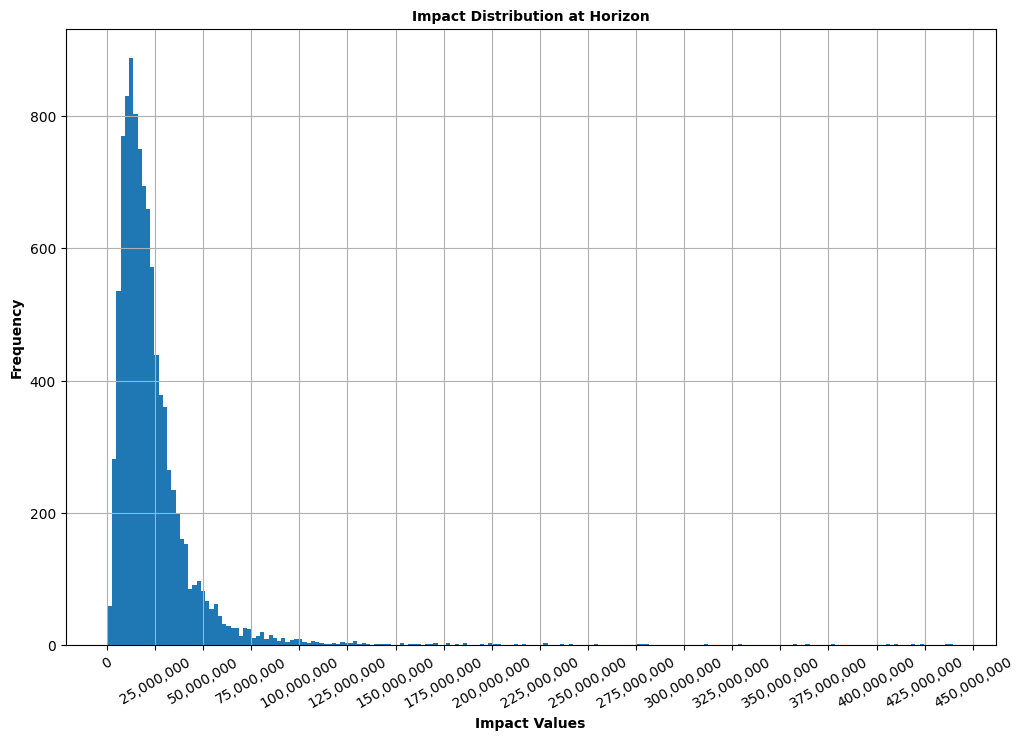

In [19]:
plot_final_impact_distribution(df_impact_results=df_results, used_bins=bins_number)

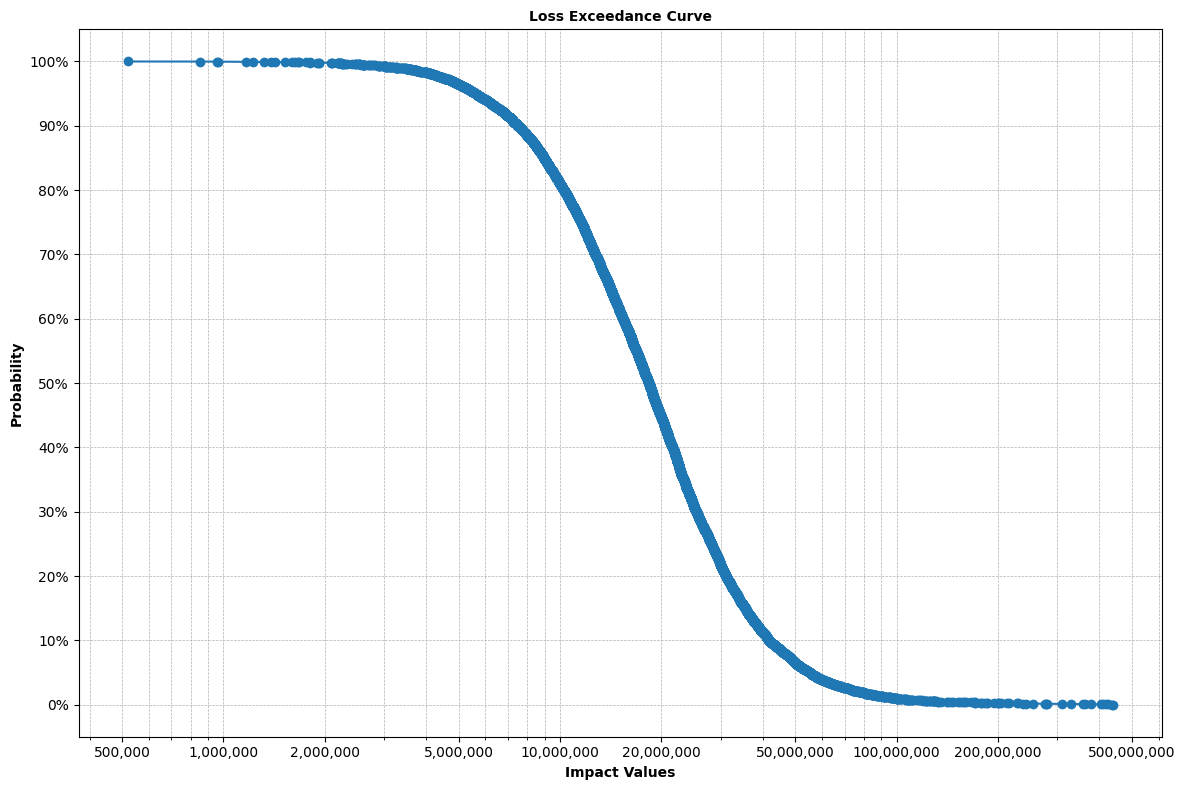

In [13]:
plot_loss_curve(df_results)

In [14]:

# Set global float format to show commas and no scientific notation
pd.options.display.float_format = '{:,.0f}'.format

df_metrics.index = ['Horizon']
df_metrics.iloc[:,1:]

,95%-Percentile Impact,99%-Percentile Impact,99.999%-Percentile Impact,90% ES,95% ES,99% ES,Expected Impact,Median Impact,Mode Impact
Horizon,"55,212,940","98,487,744","439,631,574","68,690,455","89,621,522","170,706,255","23,263,382","18,363,737","520,536"


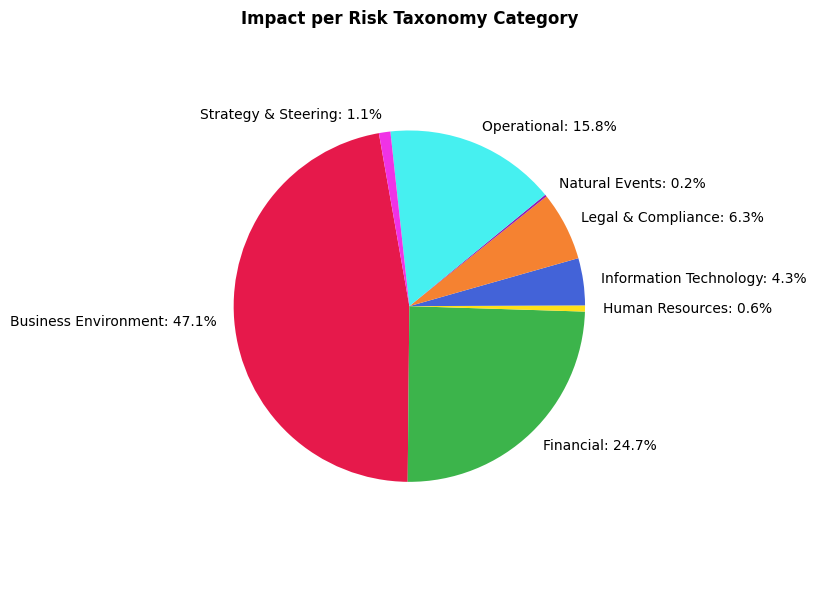

                 Taxonomy  Average Impact  Pct of Total Impact
0    Business Environment      10,950,456                   47
1               Financial       5,736,217                   25
2         Human Resources         130,995                    1
3  Information Technology       1,008,643                    4
4      Legal & Compliance       1,474,771                    6
5          Natural Events          43,413                    0
6             Operational       3,672,972                   16
7     Strategy & Steering         245,914                    1


In [15]:
plot_risk_taxonomy_dropdown(df_horizon_summary)